Shape of dataframe : (39717, 111)
Printing few rows of the data set : 
          id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 p

       collections_12_mths_ex_med  chargeoff_within_12_mths
39710                         NaN                       NaN
39711                         NaN                       NaN
39712                         NaN                       NaN
39713                         NaN                       NaN
39716                         NaN                       NaN
39498   NaN
39499   NaN
39500   NaN
39501   NaN
39502   NaN
39503   NaN
39504   NaN
39505   NaN
39506   NaN
39507   NaN
Name: pub_rec_bankruptcies, dtype: float64
Number of missing values per column : 
 id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc           

                 id     member_id     loan_amnt   funded_amnt  \
count  3.704900e+04  3.704900e+04  37049.000000  37049.000000   
mean   6.831674e+05  8.504390e+05  11293.298740  11020.404734   
std    2.098933e+05  2.648674e+05   7418.903247   7154.062220   
min    5.574200e+04  7.472400e+04    500.000000    500.000000   
25%    5.165060e+05  6.671760e+05   5600.000000   5500.000000   
50%    6.647400e+05  8.497320e+05  10000.000000  10000.000000   
75%    8.374500e+05  1.047185e+06  15000.000000  15000.000000   
max    1.077430e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv          term      int_rate   installment  \
count     37049.000000  37049.000000  37049.000000  37049.000000   
mean      10467.169415     42.516127     12.052947    326.366933   
std        7095.091781     10.673810      3.717105    207.452472   
min           0.000000     36.000000      5.420000     16.080000   
25%        5000.000000     36.000000      9.320000    168.930000   
50%   

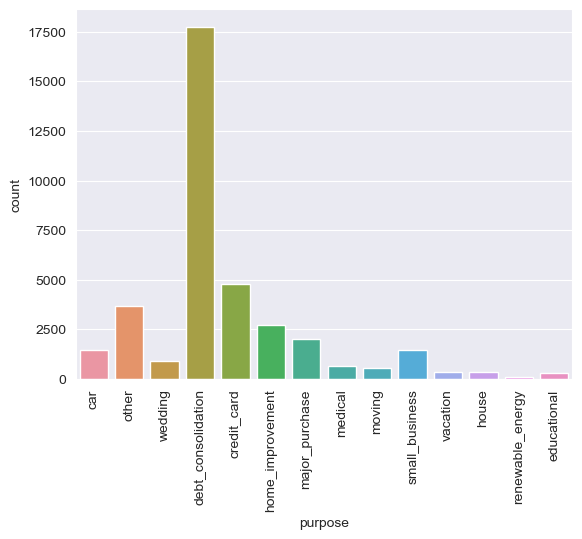

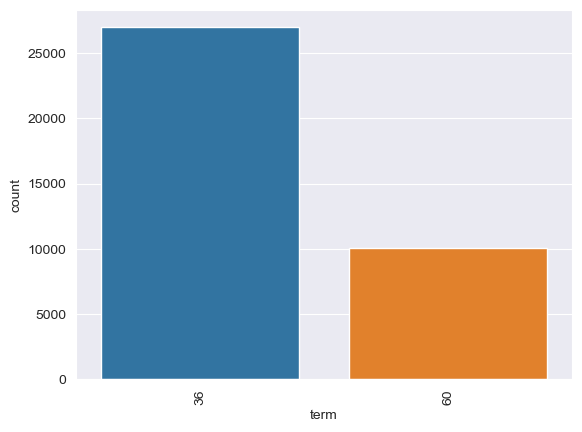

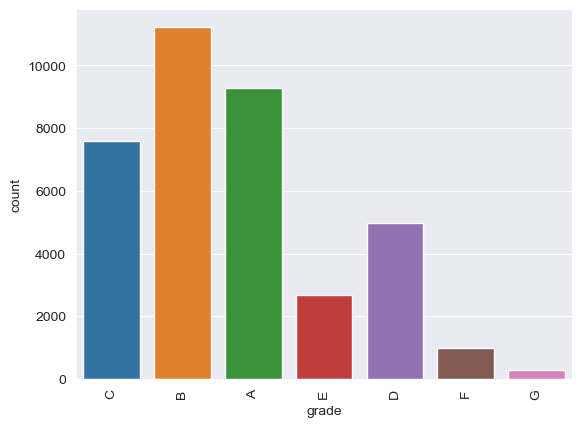

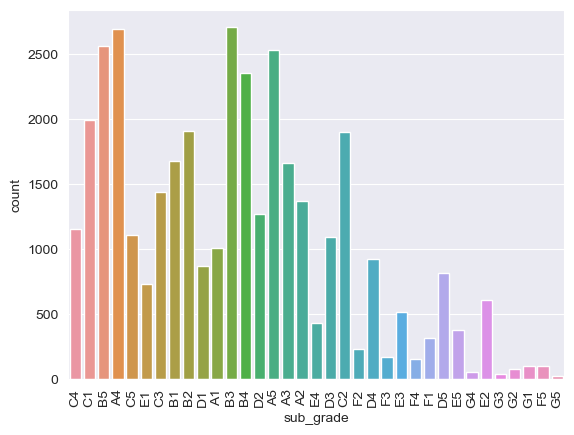

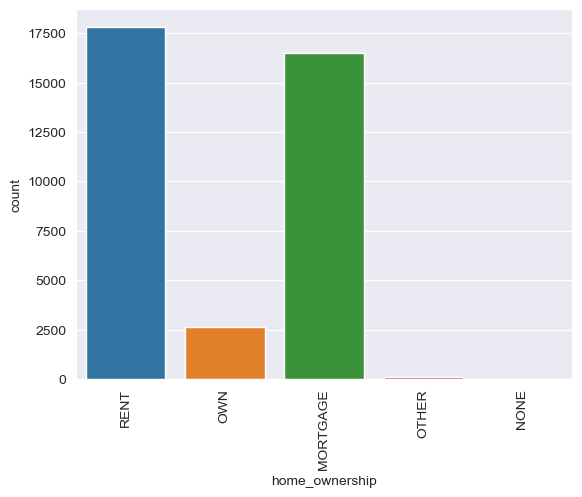

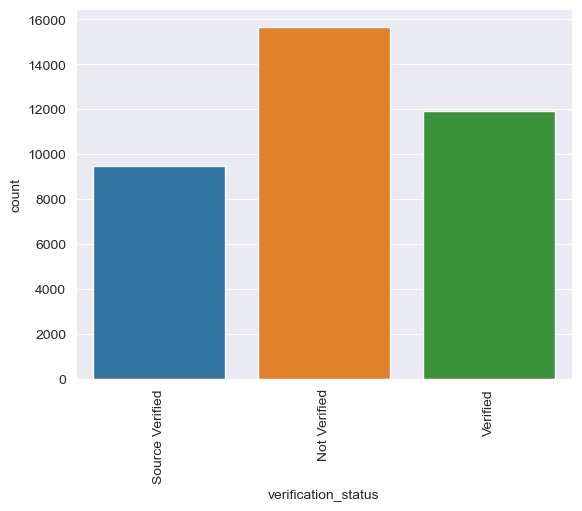

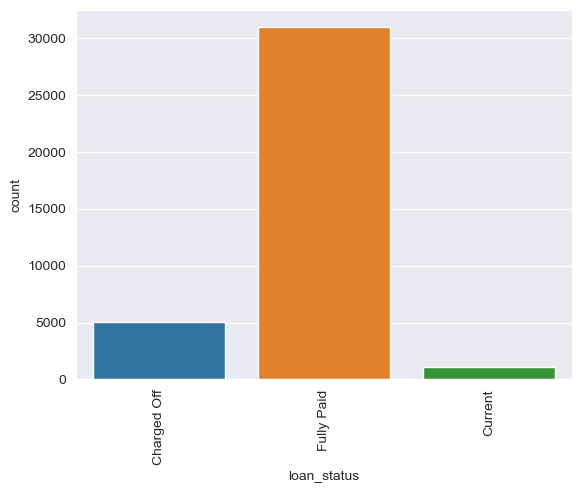

Histogram for for univariate analysis - categorical variables
None


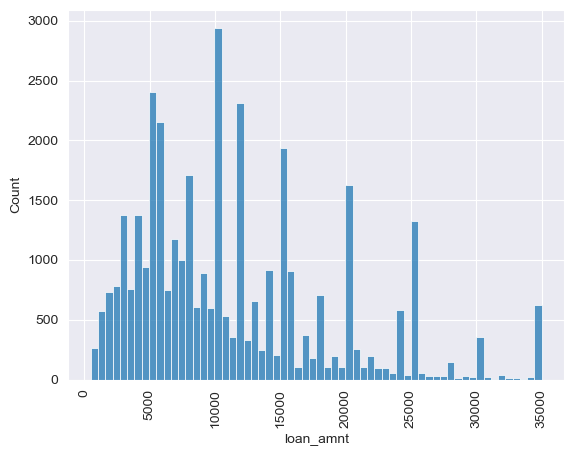

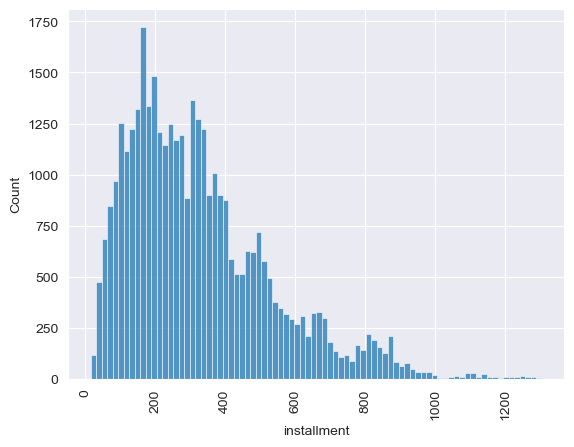

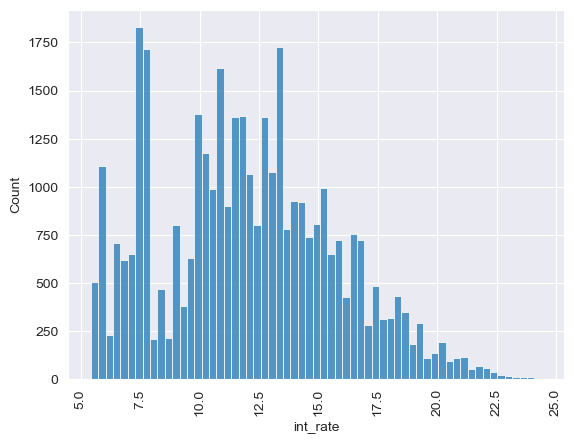

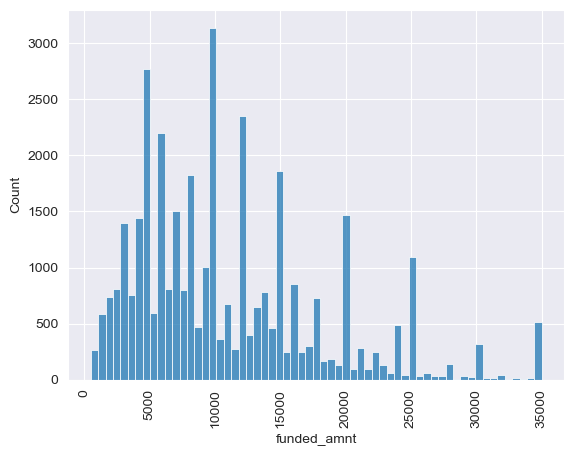

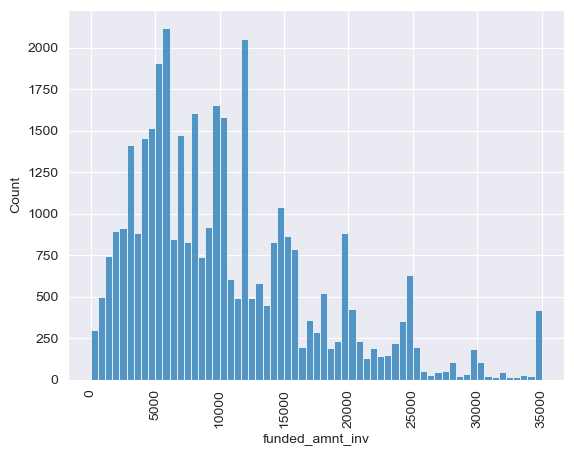

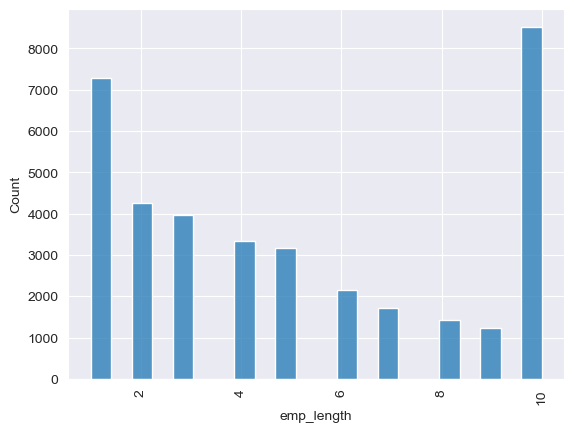

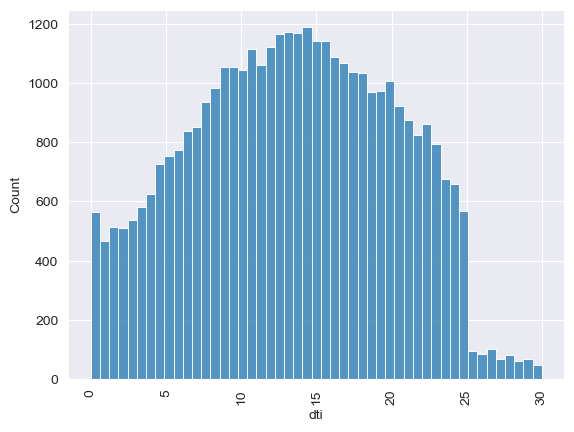

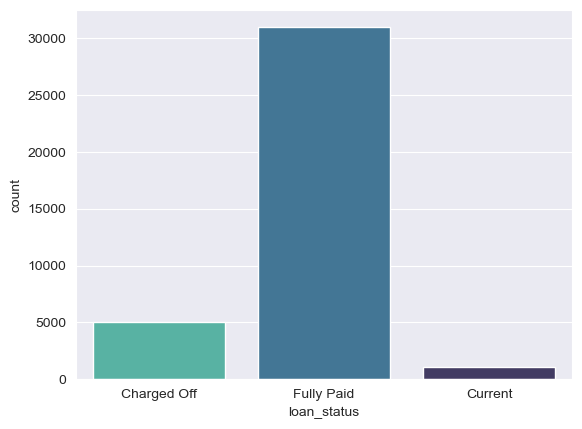

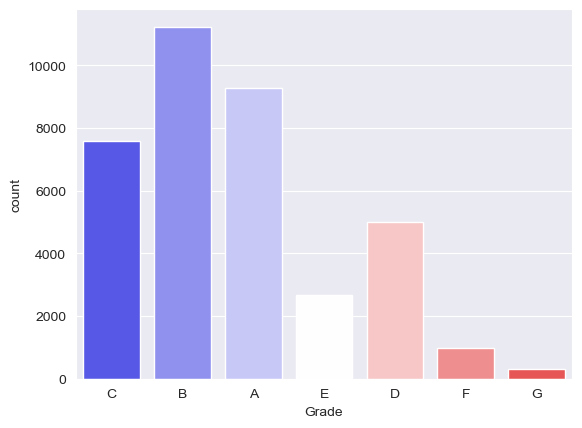

Shape of fully paid : 
 (30933, 50)
Shape of charged_off : 
 (5050, 50)
Number loan defaulters : 5050  % loa defaulters : 13.630597317066586 


C:\Users\G50-70\AppData\Local\Temp\ipykernel_9928\2307645911.py:333: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'bool_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):


loan_amnt :  False
installment :  False
int_rate :  False
funded_amnt :  False
funded_amnt_inv :  False
emp_length :  False
dti :  False
Outliers detected? False
(37049, 53)


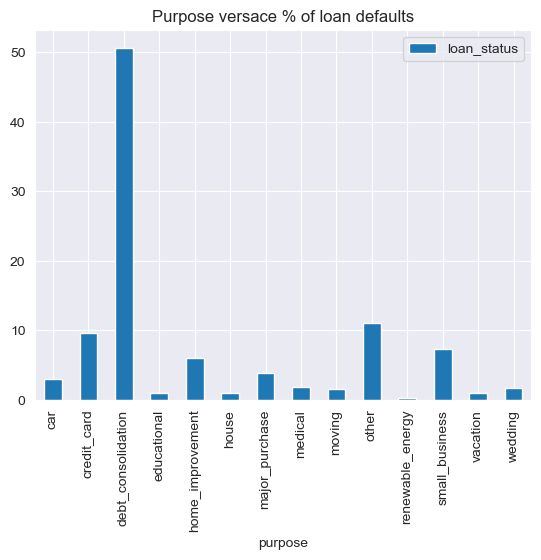

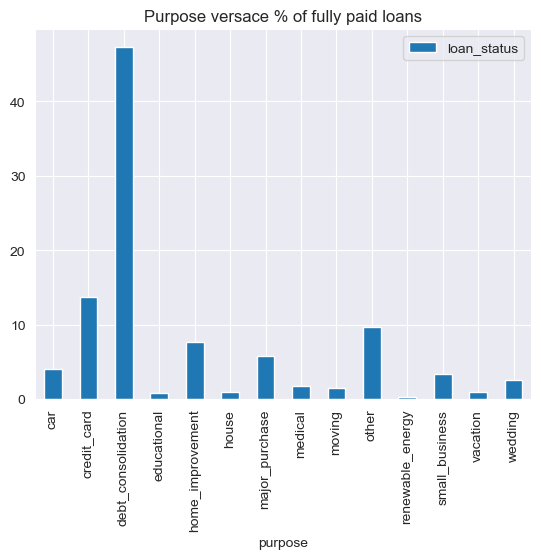

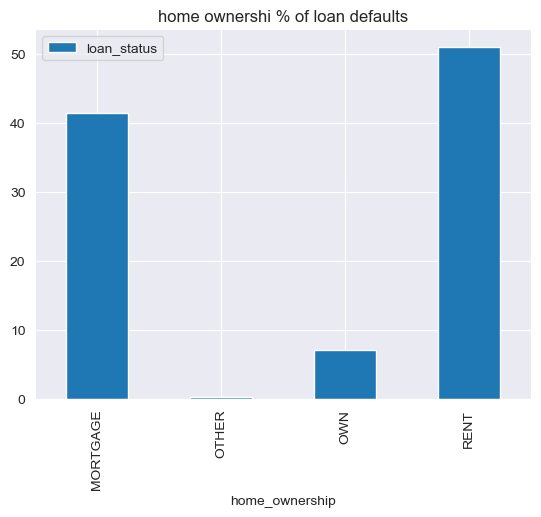

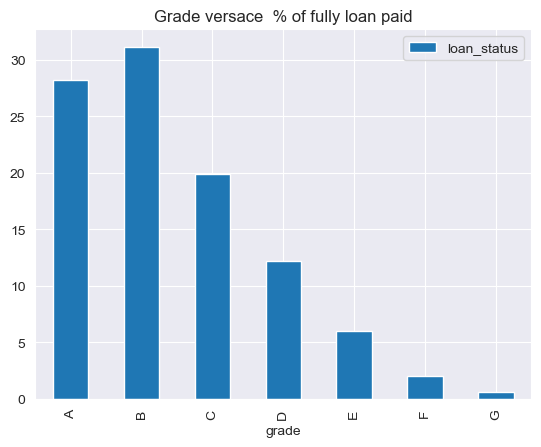

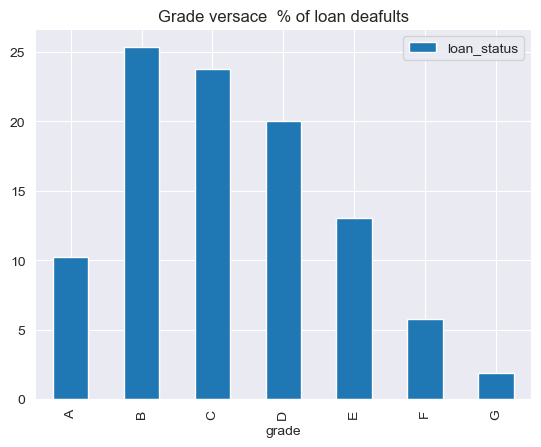

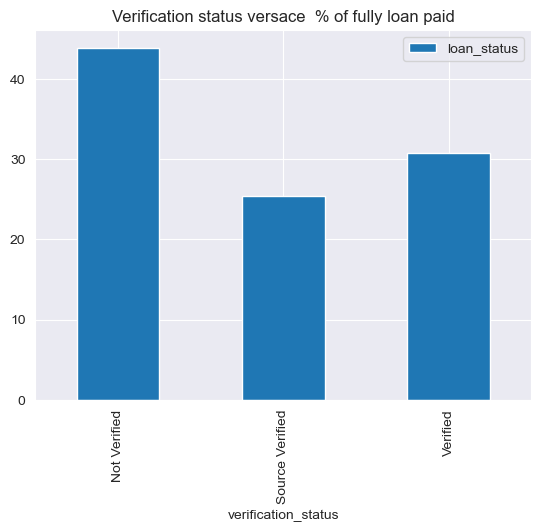

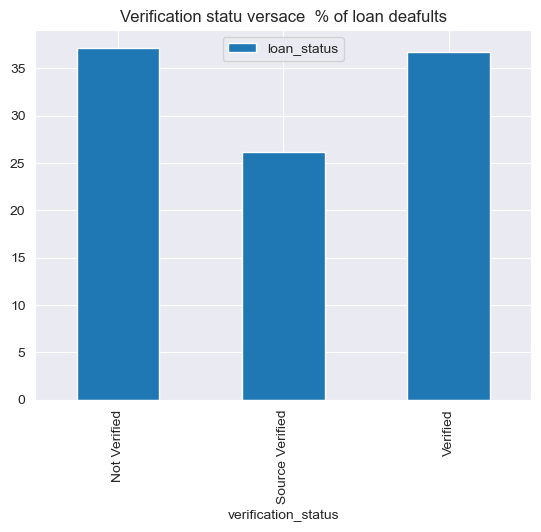

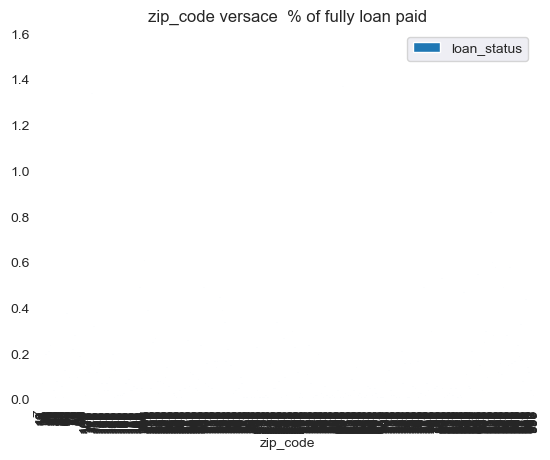

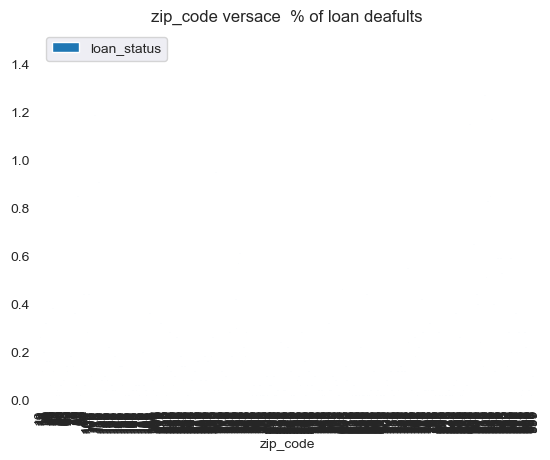

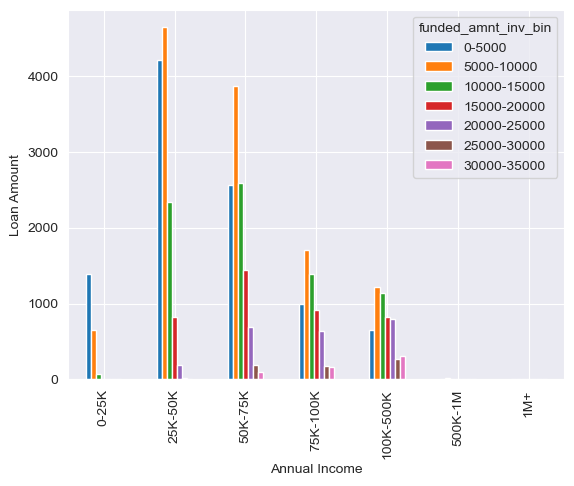

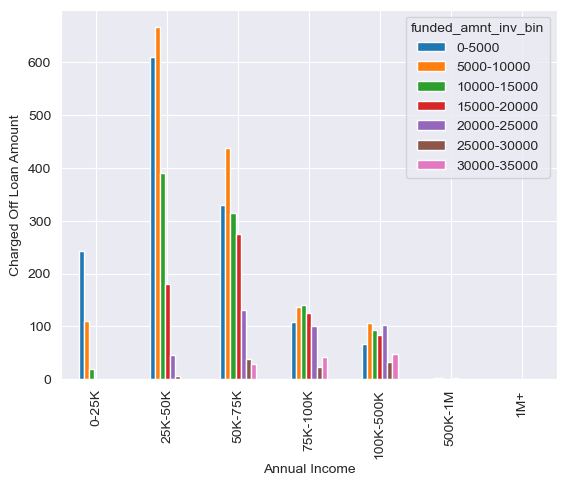

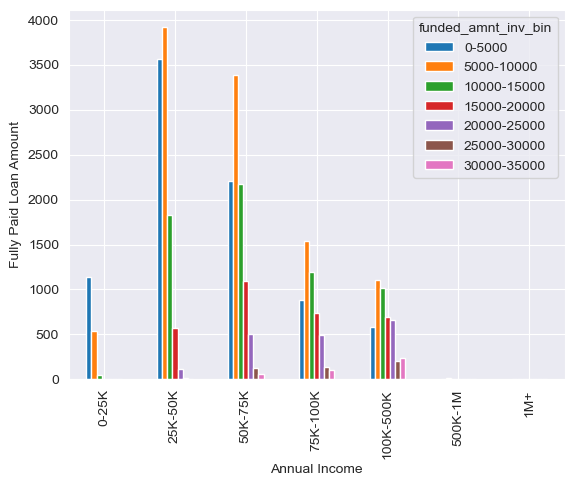

In [165]:
#Import the libraries needed for Lending CLub Case study analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re as re


# function to find the columns where all values are NaN
def find_column_with_all_NaN (df):
  nan_lst = [x for x in df.columns if len(df.index) == df[x].isnull().sum()]
  return nan_lst
       
#Deletes the given list of columns and modifies the dataframe accordingly
def del_columns_from_dataframe(df, del_lst) : 
  df.drop(del_lst, axis=1, inplace = True)

#Funtion to find the list of columns with more than/equlals to 90%  NaN values 
def find_column_with_90percent_or_more_NaN (df):
  list_90percent = [x for x in df.columns if((df[x].isnull().sum() / len(df.index))*100) >= 90]     
  return list_90percent

def convert_emp_len(emp_len) :
  emp_len = re.findall('(\d+)', emp_len) #emp_len.astype('str').str.extractall('(\d+)')
    
  #emp_len = emp_len.rstrip("+ years")
  #emp_len = emp_len.rstrip(" years")
  #emp_len = emp_len.rstrip(" year")
  #emp_len = emp_len.lstrip("<")
  #emp_len = [int(x) for x in emp_len.split() if x.isdigit()] 

  return(emp_len)

def func_percent(arg1):
  return((arg1['loan_status'].count()/len(arg1.index))*100)
    
#Read the data set for the case study 
club_case_study_df = pd.read_csv('C:\\Users\\G50-70\\Downloads\\CaseStudys\\LendingClubCaseStudy\\loan\\loan.csv', low_memory=False)

#Get the information on data set

#Print shape of dataframe to know number of columns and rows
print("Shape of dataframe : {}".format( club_case_study_df.shape) )

#Print few rows of the data set
print("Printing few rows of the data set : \n ", club_case_study_df.head())

#Print info to find data types of each column
print("Printing input of info function : \n" , club_case_study_df.info())

#Use describe method to get high level give of the data set
print("Printing the output of Describe funtion : \n",club_case_study_df.describe())

#Print columns in the dataframme
print("Printing all columns of the dataframe \n", club_case_study_df.columns)

#Printing number of missing values per column
print("Number of missing values per column : \n", club_case_study_df.isnull().sum(), "\n")

#From analysis missing values many columns have all missing values and find list of columns with NaN values
nan_column_lst = find_column_with_all_NaN(club_case_study_df)

#Drop the columans with all Nan
del_columns_from_dataframe(club_case_study_df, nan_column_lst)
print("Number of columns with all NaN vlaues : {}".format(len(nan_column_lst)))
print("Shape of data frame after dropping columnus with all NaN : {} \n".format(club_case_study_df.shape))

#Find columns with 90% or more of NaN values
list_90 = find_column_with_90percent_or_more_NaN(club_case_study_df)
#Delete columns with 90 0r more percent of NaN values
del_columns_from_dataframe(club_case_study_df, list_90)
print("Number of columns with all 90% or more NaN vlaues : {}".format(len(list_90)))
print("Shape of data frame after dropping columnus with 90% or more NaN : {} \n".format(club_case_study_df.shape))

#Print number of missing values per column after removing columns with more than 90% values missing
print("Number of missing values per column after droping columns : \n", club_case_study_df.isnull().sum(), "\n")

#print desc column to anylsis the data as this column has many missing valyes
print("Printing Desc : \n", club_case_study_df["desc"].head())
# desc column will not be used for loan decision also just description hence droping 
del_columns_from_dataframe(club_case_study_df, 'desc')
#club_case_study_df.drop('desc', axis =1, inplace=True)

# Column 'mths_since_last_delinq' has more than 64% missing values. 
print("\nPrinting mths_since_last_delinq with non missing values")
print(club_case_study_df[club_case_study_df["mths_since_last_delinq"].isnull() == False]["mths_since_last_delinq"].tail())
# Either we can drop or impute the missing values. 
#Decided to impute with zero for all mising values  

print("Number of missing values per column : \n", club_case_study_df.isnull().sum(), "\n")
print("Employee title , employee lenght \n", club_case_study_df[['emp_title', 'emp_length']].head())
#Drop row with emp__lengh as NaN
club_case_study_df = club_case_study_df[club_case_study_df['emp_length'].isnull() == False]
#Drop rows were emp_tite is NaN as it is different impute title and NaN are less
club_case_study_df = club_case_study_df[club_case_study_df['emp_title'].isnull() == False]
#print("Number of missing values per column : \n", club_case_study_df.isnull().sum(), "\n")

#print "collections_12_mths_ex_med" and "" columns for analysis
print(club_case_study_df[ ['collections_12_mths_ex_med','chargeoff_within_12_mths']  ].tail())
club_case_study_df = club_case_study_df[club_case_study_df['collections_12_mths_ex_med'].isnull() == False]
#print("Number of missing values per column : \n", club_case_study_df.isnull().sum(), "\n")

print(club_case_study_df['pub_rec_bankruptcies'][-150 : -140])

#Will impute missing values with zero as many values are zero
club_case_study_df['pub_rec_bankruptcies'].fillna(0, inplace = True)

#Fill mths_since_last_delinq with zero for missing value as many are missing.
club_case_study_df['mths_since_last_delinq'].fillna(0, inplace = True)

#Will drop rowa wherw  "last_pymnt_d" and "revol_util" are NaN as these have negligible in number 
club_case_study_df = club_case_study_df[club_case_study_df['last_pymnt_d'].isnull() == False]
club_case_study_df = club_case_study_df[club_case_study_df['revol_util'].isnull() == False]

print("Number of missing values per column : \n", club_case_study_df.isnull().sum(), "\n")


#Now we handled all missing values. Now will move analyze and correct data tupe of columns
#print(club_case_study_df.info())

# term, int_rate and zip_code should not be object. Let us inspect the values 
print("Term   and int_rate \n", club_case_study_df[['term', 'int_rate', 'zip_code']].head())
club_case_study_df['term'] = club_case_study_df['term'].apply(lambda x : int(x.rstrip(" months")))
club_case_study_df['int_rate'] = club_case_study_df['int_rate'].apply(lambda x : pd.to_numeric(x.rstrip("%")))
club_case_study_df['zip_code'] = club_case_study_df['zip_code'].apply(lambda x : int(x.rstrip("xx")))

# Looks grade, sub_grade, emp_lenght should not be objact, Print to analyze
#print("Grade  Sub_grade  and emp_lenght\n", club_case_study_df[['grade', 'sub_grade', 'emp_length']].head())

#club_case_study_df['emp_length'] = club_case_study_df['emp_length'].apply(lambda x : convert_emp_len(x))
club_case_study_df['emp_length'] = club_case_study_df['emp_length'].apply(lambda x : re.findall('(\d+)' , str(x))[0])
club_case_study_df['emp_length'] = club_case_study_df['emp_length'].apply(lambda x : pd.to_numeric(x))

#Remove % from revol_util column
club_case_study_df['revol_util'] = club_case_study_df['revol_util'].apply(lambda x : pd.to_numeric(x.rstrip("%")))
print("Printing emp_length and revol_util after correcting type \n", club_case_study_df[['emp_length', 'revol_util']])
#Print remaining columns which of object type for analysis
print(club_case_study_df[['earliest_cr_line','initial_list_status', 'pymnt_plan', 'application_type', 'last_credit_pull_d']].head())


print("Print 'initial_list_status' with values other than f")
print(club_case_study_df[club_case_study_df['initial_list_status']!='f']['initial_list_status'])

print("Print 'pymnt_plan' with values other than n")
print(club_case_study_df[club_case_study_df['pymnt_plan']!='n']['pymnt_plan'])

#From this looks all values are initial_list_status are f and pymnt_plan are n, 
#hence drop the both columns
#lst_del is hold columns to be deleted
lst_del = ['initial_list_status', 'pymnt_plan']

print(club_case_study_df.head())
#print(club_case_study_df.info())
print(club_case_study_df.shape)
#print(club_case_study_df.describe())

#From output of describe, some columns have all zeros as values. Hence we will drop these columns
# Columns 'policy_code' has all ones, hence droping it
lst_del.extend(['policy_code','acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'collections_12_mths_ex_med'])
print("List of columns getting deleted : \n", lst_del)
del_columns_from_dataframe(club_case_study_df, lst_del)
print(club_case_study_df.info())
print(club_case_study_df.describe())

#Splitting issue_d into issue_month,issue_year to get more meaningful analysis
club_case_study_df['issue_month'] = club_case_study_df['issue_d'].apply(lambda x:x.split('-')[0])
club_case_study_df['issue_year'] = club_case_study_df['issue_d'].apply(lambda x:x.split('-')[1])
club_case_study_df['issue_year'] = club_case_study_df['issue_year'].apply(lambda x:(int(x) + 2000))

#Splitting last_pymnt_d into month and year to get more meaningful analysi
club_case_study_df['last_pymnt_month'] = club_case_study_df['last_pymnt_d'].apply(lambda x:str(x).split('-')[0])
club_case_study_df['last_pymnt_year'] = club_case_study_df['last_pymnt_d'].apply(lambda x:str(x).split('-')[1])
club_case_study_df['last_pymnt_year'] = club_case_study_df['last_pymnt_year'].apply(lambda x:(int(x) + 2000))


#Arranging the columns into Categorical, Continous, Extra for further analysis
categorical = ['purpose', 'term','grade','sub_grade','home_ownership','verification_status','loan_status']
continuous = ['loan_amnt','installment','int_rate','funded_amnt','funded_amnt_inv','emp_length','dti']
extra = ['id','member_id','emp_title','title','addr_state','inq_last_6mths','total_rec_late_fee','recoveries','collection_recovery_fee','collections_12_mths_ex_med']
'                   '

#Histogram for univariate analysis - categorical variables
print("Histogram for for univariate analysis - categorical variables" )
for i in categorical:
  sns.countplot(x=club_case_study_df[i])
  plt.xticks(rotation=90)
  plt.show()

#Histogram for univariate analysis - continuous variables
print(print("Histogram for for univariate analysis - categorical variables" ))
for i in continuous:
    sns.histplot(club_case_study_df[i])
    plt.xticks(rotation=90)
    plt.show()
    
    
    
#Seaborn plot for analysing loan status and grade
sns.countplot(x="loan_status", data=club_case_study_df, palette="mako_r")
plt.show()

sns.countplot(x='grade', data=club_case_study_df, palette="bwr")
plt.xlabel("Grade")
plt.show()

#Creating seperate data frames for Fully_Paid and Charged_Off loans
fully_paid=club_case_study_df[(club_case_study_df.loan_status=="Fully Paid")]
charged_off=club_case_study_df[(club_case_study_df.loan_status=="Charged Off")]
print('Shape of fully paid : \n', fully_paid.shape)
print('Shape of charged_off : \n', charged_off.shape)
#Print number of loan defaulters and % of loan defautler
print("Number loan defaulters : {}  % loa defaulters : {} ".format(len(charged_off.index), ((len(charged_off.index)/len(club_case_study_df.index))*100) ))

#Analysing loan defaults based on purpose using pivot table
p_table = pd.pivot_table(charged_off, values = 'loan_status', index = 'purpose', aggfunc=lambda x: round(x.count()/len(charged_off.index), 4)*100)
p_table.plot(kind="bar", title="Purpose versace % of loan defaults")
plt.xticks(horizontalalignment="center")  

#Analysing fully paid loans based on purpose using pivot table
p_table = pd.pivot_table(fully_paid, values = 'loan_status', index = 'purpose', aggfunc=lambda x: round(x.count()/len(fully_paid.index), 4)*100)
p_table.plot(kind="bar", title="Purpose versace % of fully paid loans")
plt.xticks(horizontalalignment="center")  

#Analysing loan defaults based on the home ownership using pivot table
p_table = pd.pivot_table(charged_off, values = 'loan_status', index = 'home_ownership', aggfunc=lambda x: round(x.count()/len(charged_off.index), 4)*100)
p_table.plot(kind="bar", title="home ownershi % of loan defaults")
plt.xticks(horizontalalignment="center")  

#Analysing the pattern of fully paid  loans on various grades
p_table = pd.pivot_table(fully_paid, values = 'loan_status', index = 'grade', aggfunc=lambda x: round(x.count()/len(fully_paid.index), 4)*100)
p_table.plot(kind="bar", title="Grade versace  % of fully loan paid")
plt.xticks(horizontalalignment="center") 

#Analysing the pattern of charged off loans on various grades
p_table = pd.pivot_table(charged_off, values = 'loan_status', index = 'grade', aggfunc=lambda x: round(x.count()/len(charged_off.index), 4)*100)
p_table.plot(kind="bar", title="Grade versace  % of loan deafults")
plt.xticks(horizontalalignment="center")

#Analysing the pattern of fully paid  loans on various verification status
p_table = pd.pivot_table(fully_paid, values = 'loan_status', index = 'verification_status', aggfunc=lambda x: round(x.count()/len(fully_paid.index), 4)*100)
p_table.plot(kind="bar", title="Verification status versace  % of fully loan paid")
plt.xticks(horizontalalignment="center")

#Analysing the pattern of charged off loans on various grades
p_table = pd.pivot_table(charged_off, values = 'loan_status', index = 'verification_status', aggfunc=lambda x: round(x.count()/len(charged_off.index), 4)*100)
p_table.plot(kind="bar", title="Verification statu versace  % of loan deafults")
plt.xticks(horizontalalignment="center")

#Analysing the pattern of fully paid  loans on various zip code
p_table = pd.pivot_table(fully_paid, values = 'loan_status', index = 'zip_code', aggfunc=lambda x: round(x.count()/len(fully_paid.index), 4)*100)
p_table.plot(kind="bar", title="zip_code versace  % of fully loan paid")
plt.xticks(horizontalalignment="center")

#Analysing the pattern of charged off loans on various grades
p_table = pd.pivot_table(charged_off, values = 'loan_status', index = 'zip_code', aggfunc=lambda x: round(x.count()/len(charged_off.index), 4)*100)
p_table.plot(kind="bar", title="zip_code versace  % of loan deafults")
plt.xticks(horizontalalignment="center")

#Analysing distribution of loan_status and grade
#print('Analysing distribution of loan_status and grade')
#sns.countplot(x = club_case_study_df['grade'], hue = club_case_study_df['loan_status'], palette='flare') 
#plt.xlabel("Grade")
#plt.show()

#pd.crosstab(club_case_study_df.grade,club_case_study_df.loan_status).plot(kind="bar",figsize=(20,6), color = ['g','r','b'])
#plt.title('Loan status distribution with respect to grade')
#plt.legend(["Fully Paid","Charged Off","Current"])
#plt.xlabel('Grade')
#plt.ylabel('Counts')
#plt.show()

#Analysing distribution of loan_status and source
#print('Analysing distribution of loan_status and source')
#sns.countplot(x = club_case_study_df['verification_status'], hue = club_case_study_df['loan_status'], palette='flare') 
#plt.xlabel("Verification_Status")
#plt.show()


#pd.crosstab(club_case_study_df.verification_status,club_case_study_df.loan_status).plot(kind="bar",figsize=(20,6), color = ['g','r','b'])
#plt.title('Loan status distribution with respect to verification')
#plt.legend(["Fully Paid","Charged Off","Current"])
#plt.xlabel('source')
#plt.ylabel('Counts')
#plt.show()


#creating bins for values as the range is very high

#creating bin for funded_amnt_inv
club_case_study_df["funded_amnt_inv"].describe()
bin_labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000','20000-25000', '25000-30000','30000-35000']
bins = [-1, 5000, 10000, 15000, 20000,25000,30000,35000]
club_case_study_df['funded_amnt_inv_bin'] = pd.cut(club_case_study_df['funded_amnt_inv'], bins=bins, labels=bin_labels)


#creating bin for int_rate
club_case_study_df.int_rate.describe()
bin_labels = ['0-5', '5-10', '10-15', '15-20','20-25', '25-30']
bins = [0, 5, 10, 15, 20, 25, 30]
club_case_study_df['int_rate_bin'] = pd.cut(club_case_study_df['int_rate'], bins=bins, labels=bin_labels)


#creating bin for annual_income
club_case_study_df.annual_inc.describe()
bin_labels = ['0-25K', '25K-50K', '50K-75K', '75K-100K','100K-500K', '500K-1M','1M+']
bins = [0, 25000, 50000, 75000, 100000,500000,1000000,10000000]
club_case_study_df['annual_inc_bin'] = pd.cut(club_case_study_df['annual_inc'], bins=bins, labels=bin_labels)


#Analysing the annual_income and its impact on loan
raw_table=pd.pivot_table(club_case_study_df, index='funded_amnt_inv_bin',columns='annual_inc_bin',values='funded_amnt_inv',aggfunc='count')
raw_table.T.plot(kind='bar', ylabel='Loan Amount', xlabel='Annual Income')

loan_default=club_case_study_df[club_case_study_df.loan_status == "Charged Off"]
raw_table=pd.pivot_table(loan_default, index='funded_amnt_inv_bin',columns='annual_inc_bin',values='funded_amnt_inv',aggfunc='count')
raw_table.T.plot(kind='bar', ylabel='Charged Off Loan Amount', xlabel='Annual Income')

loan_defaulted=club_case_study_df[club_case_study_df.loan_status == "Fully Paid"]
raw_table=pd.pivot_table(loan_defaulted, index='funded_amnt_inv_bin',columns='annual_inc_bin',values='funded_amnt_inv',aggfunc='count')
raw_table.T.plot(kind='bar', ylabel='Fully Paid Loan Amount', xlabel='Annual Income')

#Outlier Analysis
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
outliers = []
# Outlier detection for continuous variables
for col in continuous:
    print(f"{col} :  {check_outlier(club_case_study_df, col)}")
    outliers.append(check_outlier(club_case_study_df, col))
    
print(f"Outliers detected? {np.array(outliers).any()}")

#Removing outliers
replace_with_thresholds(club_case_study_df, "annual_inc")
print(club_case_study_df.shape)


#Data Correlation check
#sns.set_style(style="darkgrid")
#print(club_case_study_df.corr()['annual_inc'])
#corr = club_case_study_df.corr()
#plt.figure(figsize=(10,10))
#sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
#            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
#            annot=True, annot_kws={"size": 11}, square=True);
#plt.show()

#From output it clear that member_id and id are not repeated

#By looking at both columns data, both have NaN values in same rows, hence decided to drop 


#Univariate analysis 

#Plot bar plat on loan status , tearm, months , home_owership



#data_dictionary_df = pd.read_excel("C:\\Users\\G50-70\\Downloads\\CaseStudys\\LendingClubCaseStudy\\Data_Dictionary.xlsx")
#data_dictionary = data_dictionary_df.to_dict()
#print(data_dictionary)


<AxesSubplot:title={'center':'int rate versus % of loan defaults'}, xlabel='Intrest rate bin', ylabel='Percentage of loan defauts'>

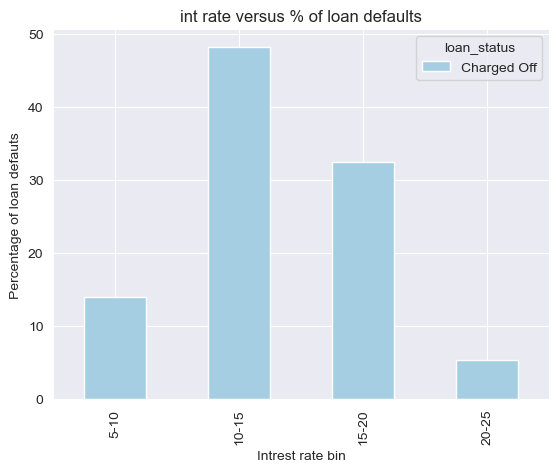

In [156]:
#Analysing the default loan vs Int rate
club_case_study_df.int_rate.describe()
bin_labels = ['0-5', '5-10', '10-15', '15-20','20-25', '25-30']
bins = [0, 5, 10, 15, 20, 25, 30]
club_case_study_df['int_rate_bin'] = pd.cut(club_case_study_df['int_rate'], bins=bins, labels=bin_labels)

loan_default=club_case_study_df[club_case_study_df.loan_status == "Charged Off"]

raw_table=pd.pivot_table(loan_default, index='int_rate_bin',columns='loan_status',values='int_rate',aggfunc=lambda x:round(x.count()/len(loan_default.index),4)*100)
raw_table.style.hide(axis = "columns")
raw_table.plot(kind='bar', ylabel='Percentage of loan defauts', xlabel='Intrest rate bin', colormap = 'Paired',title = "int rate versus % of loan defaults")





<AxesSubplot:title={'center':'int rate versus % of Fully Paid'}, xlabel='Intrest rate bin', ylabel='Percentage of fully Paid'>

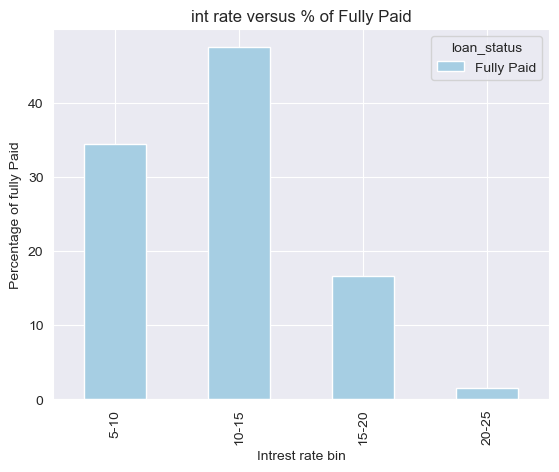

In [158]:
#Analysing the Fully paid loan vs Int rate
club_case_study_df.int_rate.describe()
bin_labels = ['0-5', '5-10', '10-15', '15-20','20-25', '25-30']
bins = [0, 5, 10, 15, 20, 25, 30]
club_case_study_df['int_rate_bin'] = pd.cut(club_case_study_df['int_rate'], bins=bins, labels=bin_labels)

fully_paid=club_case_study_df[club_case_study_df.loan_status == "Fully Paid"]

raw_table=pd.pivot_table(fully_paid, index='int_rate_bin',columns='loan_status',values='int_rate',aggfunc=lambda x:round(x.count()/len(fully_paid.index),4)*100)
raw_table.style.hide(axis = "columns")
raw_table.plot(kind='bar', ylabel='Percentage of fully Paid', xlabel='Intrest rate bin', colormap = 'Paired',title = "int rate versus % of Fully Paid")



<AxesSubplot:title={'center':' states versace  % of loan deafults'}, xlabel='addr_state', ylabel='Percentage of loan defaults'>

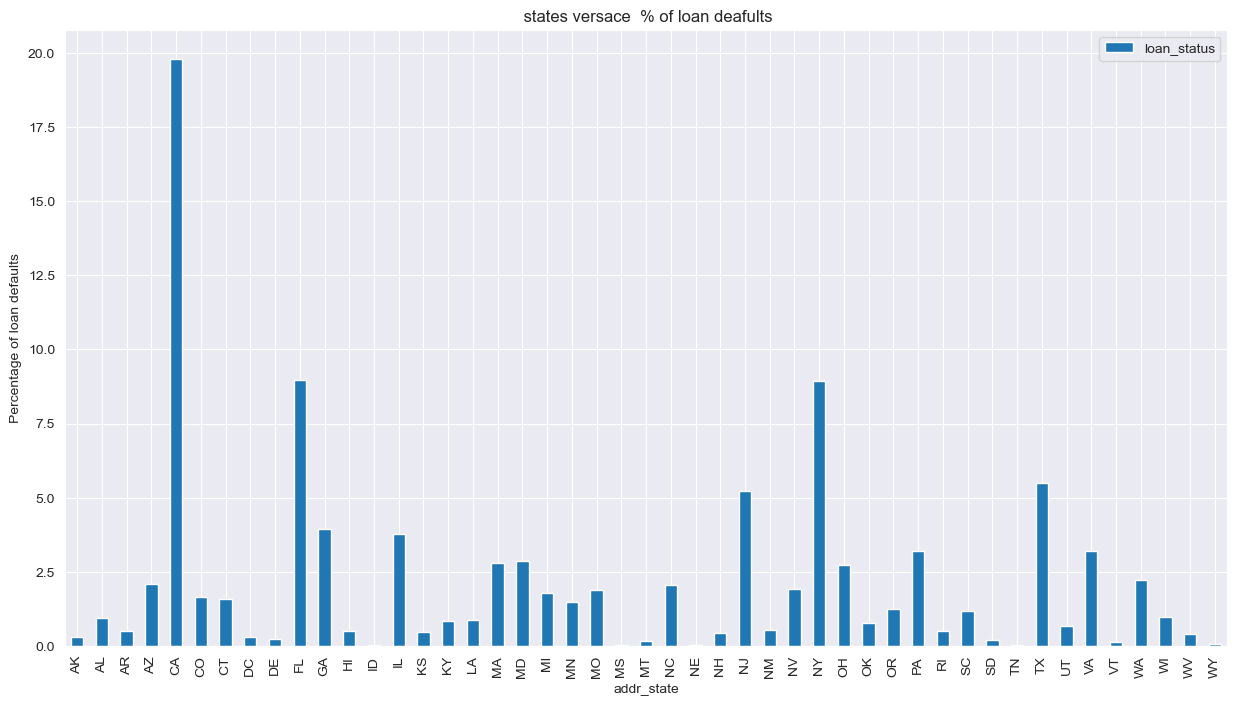

In [162]:
#Analysing the pattern of charged off loans on various states
p_table = pd.pivot_table(charged_off, values = 'loan_status', index = 'addr_state', aggfunc=lambda x: round(x.count()/len(charged_off.index), 4)*100)
p_table.plot(kind="bar",ylabel='Percentage of loan defaults', title=" states versace  % of loan deafults",figsize=(15, 8) )


<AxesSubplot:title={'center':' states versace  % of fully paid loans'}, xlabel='addr_state', ylabel='Percentage of fully paid'>

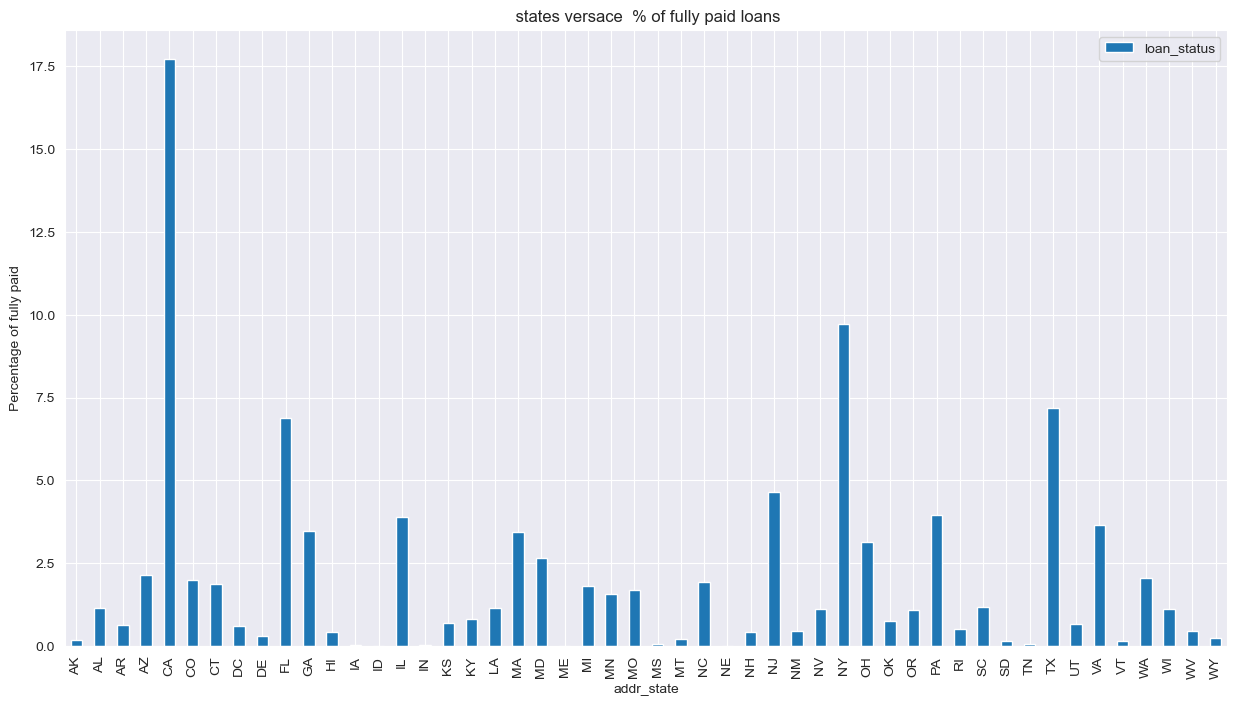

In [164]:
 #Analysing the pattern of fully paid loans on various states
p_table = pd.pivot_table(fully_paid, values = 'loan_status', index = 'addr_state', aggfunc=lambda x: round(x.count()/len(fully_paid.index), 4)*100)
p_table.plot(kind="bar", ylabel='Percentage of fully paid', title=" states versace  % of fully paid loans",figsize=(15, 8))


<AxesSubplot:title={'center':'annual inc versus % of Fully Paid'}, xlabel='annual income', ylabel='Percentage of Fully Paid'>

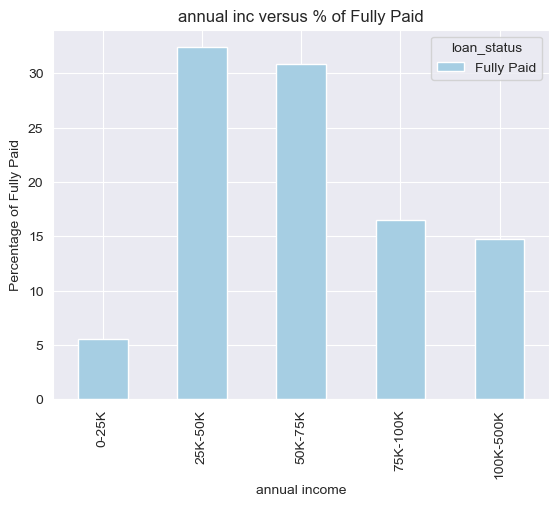

In [168]:
#Analysing the annual_income and its impact on fully paid members

bin_labels = ['0-25K', '25K-50K', '50K-75K', '75K-100K','100K-500K', '500K-1M','1M+']
bins = [0, 25000, 50000, 75000, 100000,500000,1000000,10000000]
club_case_study_df['annual_inc_bin'] = pd.cut(club_case_study_df['annual_inc'], bins=bins, labels=bin_labels)

fully_paid=club_case_study_df[club_case_study_df.loan_status == "Fully Paid"]

raw_table=pd.pivot_table(fully_paid, index='annual_inc_bin',columns='loan_status',values='annual_inc',aggfunc=lambda x:round(x.count()/len(fully_paid.index),4)*100)
raw_table.style.hide(axis = "columns")
raw_table.plot(kind='bar', ylabel='Percentage of Fully Paid', xlabel='annual income', colormap = 'Paired',title = "annual inc versus % of Fully Paid")



<AxesSubplot:title={'center':'annual inc versus % of Defaulters'}, xlabel='annual income', ylabel='Percentage of defaults'>

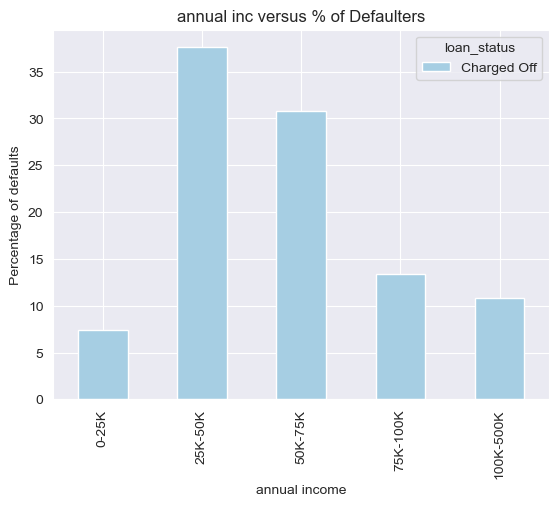

In [170]:
#Analysing the annual_income and its impact on defaulters=
bin_labels = ['0-25K', '25K-50K', '50K-75K', '75K-100K','100K-500K', '500K-1M','1M+']
bins = [0, 25000, 50000, 75000, 100000,500000,1000000,10000000]
club_case_study_df['annual_inc_bin'] = pd.cut(club_case_study_df['annual_inc'], bins=bins, labels=bin_labels)
charged_off=club_case_study_df[club_case_study_df.loan_status == "Charged Off"]
raw_table=pd.pivot_table(charged_off, index='annual_inc_bin',columns='loan_status',values='annual_inc',aggfunc=lambda x:round(x.count()/len(charged_off.index),4)*100)
raw_table.style.hide(axis = "columns")
raw_table.plot(kind='bar', ylabel='Percentage of defaults', xlabel='annual income', colormap = 'Paired',title = "annual inc versus % of Defaulters")
